# **YOLO and SAM for Object Detection and Segmentation**

## **Introduction**

Convolutional Neural Networks (CNNs) have transformed image classification by effectively capturing spatial patterns in data. Inspired by the visual cortex, CNNs excel at recognizing features and generalizing them across images. This work examines their application in image detection, instance segmentation and Semantic segmentation, highlighting their structure and functionality.

Fortunately, nowadays there are incredible software tools that have been programmed and tested over the past few years, which we can use for a variety of use cases. In this notebook, we will make use of two such tools: YOLO models and SAM models.

### **YOLO (You Only Look Once)**
YOLO is a popular family of real-time object detection models. They are designed to detect objects in images or videos with high accuracy and speed. YOLO models are often used in computer vision applications such as autonomous driving, surveillance, and medical imaging for detecting and classifying various objects within a scene.

### **SAM (Segment Anything Model)**
SAM is a model designed for image segmentation tasks. It is a state-of-the-art model that can segment any object in an image with minimal effort. SAM is particularly useful when the goal is to identify and isolate specific regions of an image, which can be valuable for tasks like medical image analysis, object tracking, or image editing.

Clearly, the necessity of GPU power is required to run, test, and train these models, unless you want your CPU to be working for days just to perform inference on a single image.


In [118]:
!nvidia-smi

Wed Dec 11 11:20:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              34W /  70W |  14169MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics
!pip install segment-anything

## Object Detection
Object detection is a computer vision task that involves identifying and locating objects within an image or video. It not only classifies objects into predefined categories but also provides the coordinates of a bounding box around each detected object. Object detection is crucial in various applications, such as autonomous driving, video surveillance, robotics, and image analysis.

In the context of deep learning, object detection algorithms, like YOLO (You Only Look Once), typically use Convolutional Neural Networks (CNNs) to process images and make predictions about the presence and location of objects. These models are trained on labeled datasets, where each object is associated with a label (e.g., 'car', 'person') and the coordinates of a bounding box.

### YOLO Models
YOLO (You Only Look Once) is a state-of-the-art object detection algorithm that can detect multiple objects in real-time by dividing the image into a grid and predicting bounding boxes and class probabilities for each grid cell. It is known for its speed and efficiency, as it processes the entire image in one pass through the network.

### YOLO Architecture
YOLO models consist of a single convolutional network that simultaneously predicts multiple bounding boxes and class probabilities from an input image. The model divides the image into a grid of cells, and each cell predicts bounding boxes and class labels for objects it contains. YOLO is trained to optimize both the classification and localization of objects simultaneously, which enables it to make real-time predictions.

YOLO has evolved over time, and there are several versions of the model (e.g., YOLOv3, YOLOv4, YOLOv5, YOLOv7, YOLOv8, YOLOv11) with improvements in architecture, speed, and accuracy.
<img src="./images/yolov5-model-structure.avif" style="width: 600px;">

### YOLO Sizes
The different sizes in YOLO models (e.g., YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x) refer to the model's scale and complexity. The sizes represent trade-offs between speed and accuracy:

Small (s): These models are lighter and faster, making them suitable for real-time applications where speed is crucial, but accuracy might be slightly compromised.
Medium (m): Balanced models that offer a compromise between speed and accuracy.
Large (l): These models are more complex, with more parameters and layers, leading to better accuracy but slower performance.
Extra-large (x): The largest models, optimized for accuracy at the cost of speed. They perform well on high-resolution images and challenging detection tasks but are slower to run.
The size of the model affects:

Speed: Larger models require more computations, leading to slower inference times.
Accuracy: Larger models generally have more capacity to learn from the data and capture more complex features, leading to higher accuracy.
Computational Resources: Larger models require more memory (RAM) and processing power (e.g., GPUs) for both training and inference.

### Detection vs. Classification CNNs

**Classification CNNs** and **Detection CNNs** are both types of Convolutional Neural Networks, but they serve different purposes.

- **Classification CNNs** are designed to assign a label to the entire image. The output is a single label indicating what the image represents. For example, a classification model might predict whether an image contains a 'dog' or 'cat' but does not provide information about the location of the dog or cat within the image.

- **Detection CNNs** (e.g., YOLO, SSD) not only classify objects but also localize them by predicting bounding boxes. The output includes both the class label and the coordinates of the bounding box for each object detected in the image.

In terms of architecture:
- **Classification CNNs** generally have a simpler output layer with one neuron for each class (using softmax or sigmoid activation).
- **Detection CNNs** have a more complex output that includes multiple components: coordinates for bounding boxes (x, y, width, height), class labels,


In [120]:
from ultralytics import YOLO

# Load a model for detection
model = YOLO("yolo11n.pt", task="detection")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 235MB/s]


### The COCO Dataset

The **COCO (Common Objects in Context)** dataset is one of the most widely used datasets for training and evaluating object detection models. It is designed to help develop algorithms for various tasks, including object detection, segmentation, and image captioning. The dataset contains:

- **Images**: Over 330,000 images, with diverse scenes that include common objects in everyday life.
- **Object Categories**: 80 object categories, such as people, animals, vehicles, furniture, and more.
- **Annotations**: Each image has multiple annotations that include:
  - **Bounding Boxes**: The coordinates of the rectangular boxes that surround the objects in the image.
  - **Segmentation Masks**: Detailed pixel-wise annotations that define the exact shape of the object.
  - **Keypoints**: Annotations for detecting human poses and body parts.
  - **Captions**: Descriptions of the image in natural language (used for tasks like image captioning).
  
The COCO dataset is particularly useful for training models that need to detect multiple objects in an image, and it emphasizes **contextual understanding** (i.e., how objects relate to each other in real-world scenes). It also provides a rich set of annotations that help in fine-tuning models for specific tasks, such as instance segmentation and keypoint detection.

COCO is frequently used to benchmark the performance of object detection models, such as YOLO, SSD (Single Shot MultiBox Detector), and Faster R-CNN. Models trained on COCO are often able to generalize well to other datasets due to its diverse nature.

In [121]:
# Train the model
train_results = model.train(
    data="coco8.yaml",             # path to dataset YAML
    epochs=100,                    # number of training epochs
    imgsz=640,                     # training image size
    device="cpu",                  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 433k/433k [00:00<00:00, 71.6MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 3547.16file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 91.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 112.69it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 6842.26it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.365      3.625      1.786         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all          4         17       0.56       0.85       0.88      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.181      2.736      1.443         34        640: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.559       0.85      0.892      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.047      2.628        1.2         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.555       0.85      0.854      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.254      3.311      1.567         20        640: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4         17      0.539       0.85      0.856      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.216      2.999      1.485         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.533       0.85      0.878      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.9883      2.696      1.331         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.534       0.85      0.878      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.8196      2.645      1.309         22        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all          4         17      0.821       0.65      0.858       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.355      2.953      1.588         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.553      0.867      0.861      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G       1.02      2.219      1.434         21        640: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.554      0.867      0.873      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.9821      2.954      1.376         34        640: 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.565      0.867      0.887      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.217      2.584      1.507         36        640: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          4         17      0.582      0.867      0.895      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.232      2.044      1.389         32        640: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          4         17      0.588      0.867      0.859      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.051      2.229      1.367         33        640: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.564      0.867      0.895      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.276      2.979      1.583         34        640: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all          4         17      0.595      0.867       0.86      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.8116      1.845       1.43         15        640: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         17      0.597      0.867      0.887      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.375      2.544      1.821         15        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.599      0.867      0.855      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.001      2.345      1.409         27        640: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4         17      0.604      0.867      0.857      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.264      1.897      1.505         22        640: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4         17      0.604      0.867      0.857      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.088      1.865      1.382         34        640: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.622      0.867      0.873      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.7635      1.384      1.137         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.622      0.867      0.873      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.261      1.835      1.351         33        640: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all          4         17      0.637        0.7      0.855      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.8914      1.817      1.308         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.637        0.7      0.855      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.9091      2.093      1.344         21        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.655      0.699      0.886      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.213      2.071      1.535         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          4         17      0.655      0.699      0.886      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.026      2.886      1.395         53        640: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all          4         17      0.667      0.699      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G       1.15      1.705      1.466         20        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.667      0.699      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.155      1.378      1.608         20        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.667      0.699      0.856      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.9491      2.172       1.41         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all          4         17      0.667      0.699      0.856      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G       1.17      1.973      1.439         30        640: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          4         17      0.657      0.695      0.854      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.9337      1.292      1.385         24        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.657      0.695      0.854      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.9981      1.388      1.428         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         17      0.662      0.694      0.854      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G       1.22      2.184      1.398         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4         17      0.662      0.694      0.854      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.9169       1.55       1.17         44        640: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.662      0.698      0.853      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.278       1.75      1.557         21        640: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.662      0.698      0.853      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.7754      1.699      1.273         16        640: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all          4         17      0.679      0.696      0.851      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.206      1.838      1.497         19        640: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          4         17      0.679      0.696      0.851      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      0.877      1.661        1.3         26        640: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.693      0.692      0.824      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.9095      1.305      1.352         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.693      0.692      0.824      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.8314      1.043      1.254         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4         17      0.709      0.607      0.823       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.8258      1.221      1.224         27        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.709      0.607      0.823       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.053       1.48       1.45         33        640: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.709      0.597      0.826       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.9938      1.518      1.292         35        640: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all          4         17      0.709      0.597      0.826       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.7467     0.8859      1.241         21        640: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all          4         17      0.709      0.588      0.824      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      0.876      1.145        1.2         46        640: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.709      0.588      0.824      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.7329      1.159      1.204         31        640: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.724      0.579      0.823      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.8459     0.9556      1.093         41        640: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all          4         17      0.724      0.579      0.823      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.8195       1.35      1.208         41        640: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.727      0.567      0.836      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.7639       1.15      1.058         44        640: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.727      0.567      0.836      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.8235      1.084      1.133         32        640: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.724      0.531      0.752      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.7306     0.8883       1.22         24        640: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all          4         17      0.724      0.531      0.752      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.089       1.23      1.376         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          4         17      0.728      0.483      0.722      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.075      1.005      1.445         19        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.728      0.483      0.722      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.8976      1.016      1.258         22        640: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all          4         17      0.728      0.483      0.722      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.8842      1.034      1.487         15        640: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.749      0.498      0.704      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.6833      0.843      1.161         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.749      0.498      0.704      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.004     0.9559      1.355         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all          4         17      0.749      0.498      0.704      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      0.785     0.8958      1.243         24        640: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.874      0.412      0.712      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.8849      1.005       1.24         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.874      0.412      0.712      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.6154     0.6647      1.061         18        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all          4         17      0.874      0.412      0.712      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.7483      0.797      1.118         20        640: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          4         17      0.791      0.331      0.691      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.7461     0.8668      1.216         24        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          4         17      0.791      0.331      0.691      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.6973     0.7356      1.047         32        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.791      0.331      0.691      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.7701       1.45      1.146         37        640: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all          4         17      0.873       0.41       0.63      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.7422       1.21      1.143         19        640: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.873       0.41       0.63      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.8109     0.9001      1.212         18        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.873       0.41       0.63      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.7655      1.102      1.302         21        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.873      0.409      0.577      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.7232     0.9362      1.068         43        640: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          4         17      0.873      0.409      0.577      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      0.768     0.7562      1.106         31        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.873      0.409      0.577      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.5619     0.6311      1.074         26        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.873      0.407      0.561      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.8552     0.9071      1.261         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all          4         17      0.873      0.407      0.561      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.8421     0.7696      1.329         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         17      0.873      0.407      0.561      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G        0.9     0.7901      1.324         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all          4         17      0.858      0.396      0.552      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      1.184      2.302      1.554         42        640: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.858      0.396      0.552      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.7761     0.7001       1.22         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          4         17      0.858      0.396      0.552      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.5784     0.5696      1.014         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.872      0.407      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.6701     0.7104      1.154         27        640: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all          4         17      0.872      0.407      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.6805     0.7946      1.063         36        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all          4         17      0.872      0.407      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.7067     0.6782      1.094         35        640: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.872      0.406      0.543      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.5227     0.5933      0.965         35        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.872      0.406      0.543      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.9151     0.7419      1.346         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         17      0.872      0.406      0.543      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.6641     0.9144      1.151         31        640: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4         17      0.873      0.406      0.545      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.5573      0.498     0.9679         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          4         17      0.873      0.406      0.545      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.6398     0.7606      1.119         19        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.873      0.406      0.545      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.7487      1.043      1.158         42        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all          4         17      0.873      0.405      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.7913      0.992       1.19         37        640: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.873      0.405      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.8501     0.9129      1.321         27        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.873      0.405      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.5442     0.7241      1.062         29        640: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.873      0.405      0.543      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.5704     0.8229       1.05         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all          4         17      0.872      0.401      0.518      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.8406      0.775      1.358         19        640: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          4         17      0.872      0.401      0.518      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      0.789     0.7142      1.177         28        640: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          4         17      0.872      0.401      0.518      0.219


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.6207     0.6039      1.162         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all          4         17      0.872      0.401      0.518      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.5982     0.5799      1.121         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          4         17      0.872      0.402      0.519       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.6419     0.6217      0.938         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.872      0.402      0.519       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.5924     0.5287      1.134         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.872      0.402      0.519       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.5183     0.4751     0.8953         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          4         17      0.872      0.402      0.519       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.6755      0.607     0.9726         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4         17      0.875      0.416      0.551      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.4982      0.509     0.9451         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          4         17      0.875      0.416      0.551      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      0.416     0.4225      0.932         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all          4         17      0.875      0.416      0.551      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.6286      0.548      1.026         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          4         17      0.875      0.416      0.551      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.5158     0.4602     0.9577         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          4         17      0.671      0.417      0.564      0.267



100 epochs completed in 0.112 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


                   all          4         17      0.545       0.85      0.858      0.639
                person          3         10      0.516        0.6      0.629      0.307
                   dog          1          1      0.529          1      0.995      0.796
                 horse          1          2       0.47          1      0.995      0.675
              elephant          1          2      0.351        0.5      0.537      0.264
              umbrella          1          1      0.556          1      0.995      0.895
          potted plant          1          1      0.849          1      0.995      0.895
Speed: 2.2ms preprocess, 143.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


In [127]:
# Evaluate model performance on the validation set
metrics = model.val()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


                   all          4         17      0.545       0.85      0.858      0.639
                person          3         10      0.516        0.6      0.629      0.307
                   dog          1          1      0.529          1      0.995      0.796
                 horse          1          2       0.47          1      0.995      0.675
              elephant          1          2      0.351        0.5      0.537      0.264
              umbrella          1          1      0.556          1      0.995      0.895
          potted plant          1          1      0.849          1      0.995      0.895
Speed: 2.4ms preprocess, 145.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/images/coches.jpg: 480x640 3 cars, 125.3ms
Speed: 6.0ms preprocess, 125.3ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


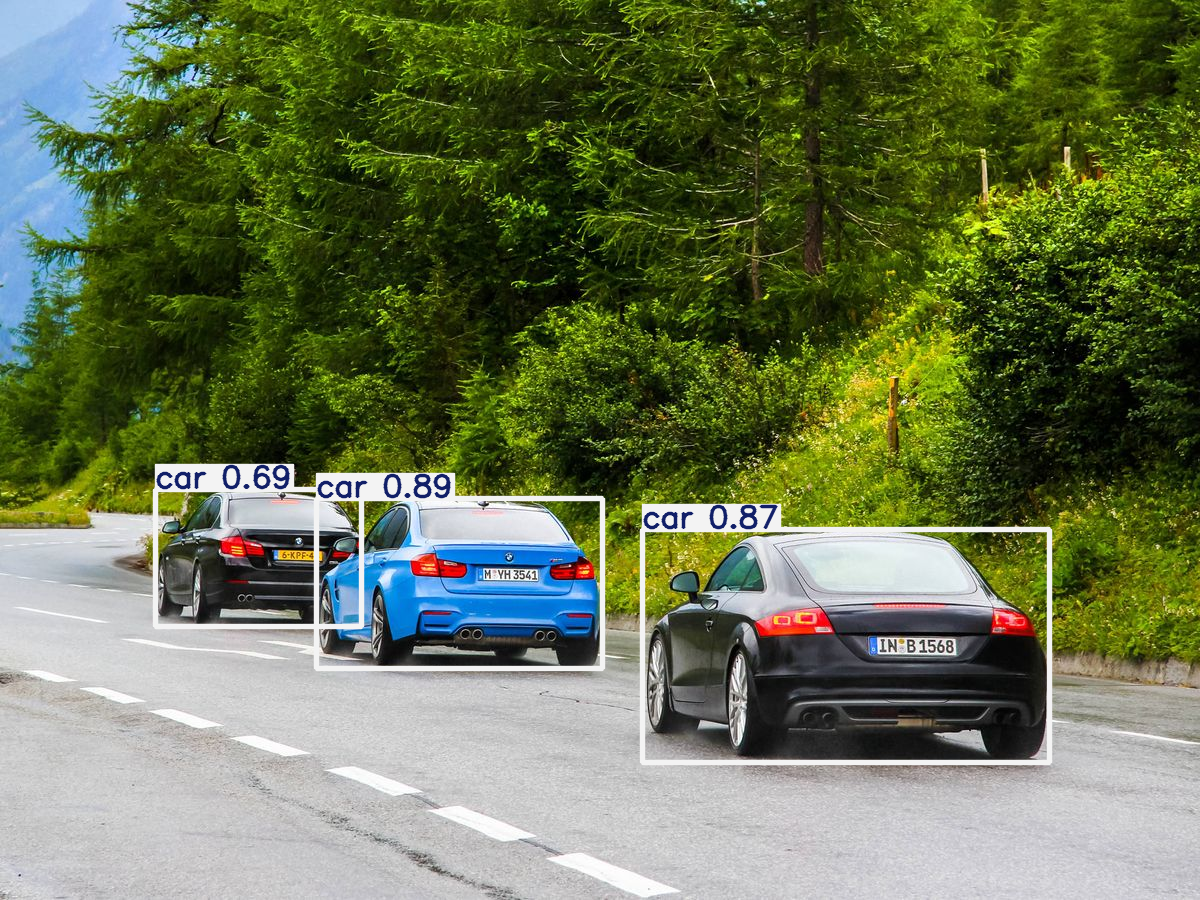

In [128]:
# Perform object detection on an image
results = model("/content/images/coches.jpg")
results[0].show()

## Instance Segmentation
The next step after object detection in the difficulty step, would be instance segmentation. Instance segmentation is a crucial task in computer vision, as it goes beyond just identifying the presence of objects in an image and takes it a step further by precisely delineating the boundaries of each object. Unlike object detection, which provides bounding boxes around detected objects, instance segmentation provides pixel-wise masks that mark the exact region occupied by each object. This is especially useful in applications where precise object boundaries are needed, such as medical imaging, autonomous driving, and scene analysis.

### How SAM Models Fit into Instance Segmentation
The SAM (Segment Anything Model) is an innovative approach to segmentation that can be used in the context of instance segmentation. These models are designed to segment anything in an image, regardless of the object category. SAMs are particularly appealing because of their generalizability and ability to provide high-quality segmentation without needing extensive retraining for specific datasets or categories.

SAMs leverage advances in deep learning, particularly transformers, which are known for their ability to process and understand spatial information. The model is trained to segment objects at the pixel level, which enables it to produce accurate instance masks for a wide range of objects.

In [3]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import torch
import numpy as np
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

--2024-12-11 12:19:31--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.121, 108.157.254.102, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.2’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   235MB/s    in 17s     

2024-12-11 12:19:48 (148 MB/s) - ‘sam_vit_h_4b8939.pth.2’ saved [2564550879/2564550879]



/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


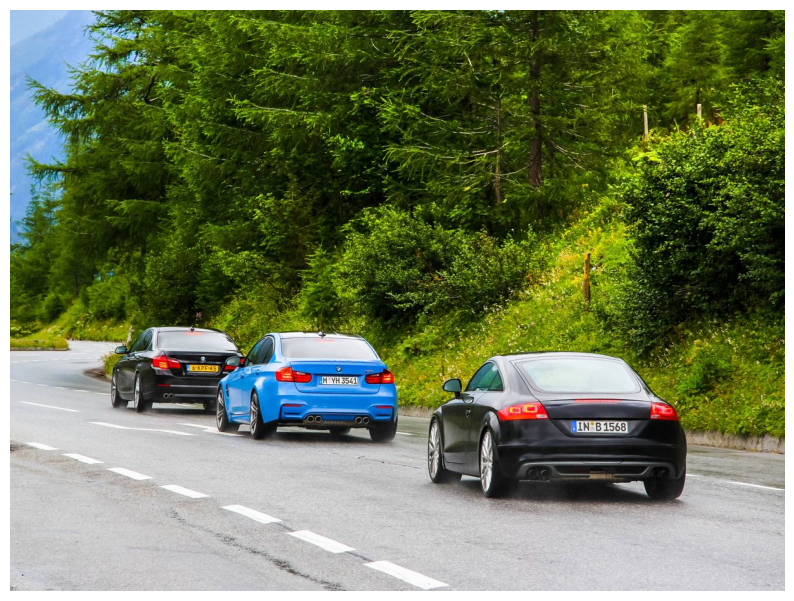

In [4]:
# Load the SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the SAM model
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

# Load the image to be segmented
image_path = "/content/images/coches.jpg"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor (C, H, W)
])

image_tensor = transform(image).unsqueeze(0).to(device)

mask_generator = SamAutomaticMaskGenerator(sam)

# Generate masks
masks = mask_generator.generate(image_tensor.squeeze(0))

# Visualize the segmentation results
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    plt.contour(mask["segmentation"], colors="r", linewidths=2)
plt.axis("off")
plt.show()